## Import Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import spacy
nlp = spacy.load("en_core_web_sm")

from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

### Read File

In [2]:
df = pd.read_json("news_dataset.json")

df.head()

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


## Data Info

In [3]:
df.shape

(12695, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12695 entries, 0 to 12694
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      12695 non-null  object
 1   category  12695 non-null  object
dtypes: object(2)
memory usage: 297.5+ KB


## Preprocessing &  Cleaning Data


In [5]:
df['category'].value_counts()

BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64

In [6]:
df['category_num'] = df['category'].map({'BUSINESS': 0, 'SPORTS': 1, 'CRIME': 2, 'SCIENCE': 3})

In [21]:
def preprocess(text):
    doc = nlp(text)
    
    filter_words = []
    
    for token in doc:
        if not (token.is_stop or token.is_punct or token.is_space):
            filter_words.append(token.lemma_.lower())
            
    preprocess_text = ' '.join(filter_words)
    return preprocess_text


In [22]:
df['preprocessed_text'] = df['text'].apply(preprocess)

In [23]:
df.head()

,text,category,category_num,preprocessed_text
0,Watching Schrödinger's Cat Die University of C...,SCIENCE,3,watch schrödinger cat die university californi...
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE,3,watch freaky vortex open flooded lake
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS,0,entrepreneur today need big budget start year ...
3,These Roads Could Recharge Your Electric Car A...,BUSINESS,0,road recharge electric car drive high tech hig...
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME,2,civilian guard fires gun protect recruiting ce...


### PipeLine 

In [24]:
clf_mnb = Pipeline([
    ('Bow_Vectorizer', CountVectorizer(ngram_range = (1,1))),
    ('Multi_NB', MultinomialNB())
])

## Splitting Train, Test

In [25]:

xtrain, xtest, ytrain, ytest = train_test_split(df['preprocessed_text'], df['category_num'], test_size = 0.2, random_state = 3,stratify = df['category_num'])


In [26]:
clf_mnb.fit(xtrain, ytrain)

ypred = clf_mnb.predict(xtest)

train = clf_mnb.score(xtrain,ytrain)
test = clf_mnb.score(xtest, ytest)

print(f'Train ACC: {train}\nTest ACC: {test}\n\n{classification_report(ytest, ypred)}')

Train ACC: 0.956675856636471
Test ACC: 0.9007483261126428

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       851
           1       0.92      0.94      0.93       833
           2       0.88      0.89      0.89       579
           3       0.91      0.73      0.81       276

    accuracy                           0.90      2539
   macro avg       0.90      0.87      0.88      2539
weighted avg       0.90      0.90      0.90      2539



In [27]:
xtest[:5]

3776    daily fantasy gambling draftkings fanduel appl...
6442    happy fourth july america love space astronome...
846                7 challenge successful people overcome
652     man flu stories women health dudes new study i...
8207    store showroom have cake eat 2005 shop acousti...
Name: preprocessed_text, dtype: object

In [28]:
ytest[:5]

3776    1
6442    3
846     0
652     3
8207    0
Name: category_num, dtype: int64

In [29]:
ypred[:5]

# 'BUSINESS': 0, 'SPORTS': 1, 'CRIME': 2, 'SCIENCE': 3

array([1, 3, 0, 3, 0], dtype=int64)

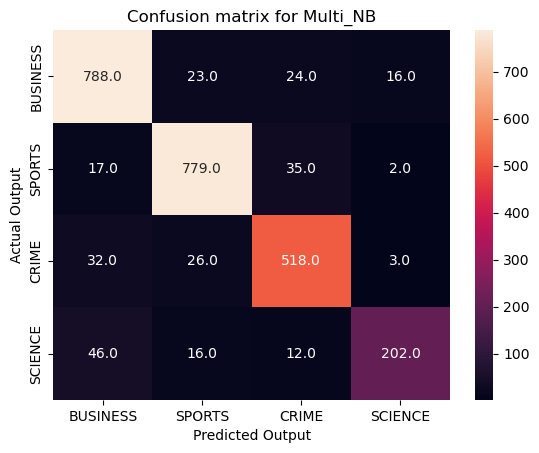

In [30]:
confusion_m =confusion_matrix(ytest, ypred)

sns.heatmap(confusion_m, annot = True, fmt = '.1f',
            xticklabels = ['BUSINESS', 'SPORTS', 'CRIME', 'SCIENCE'], yticklabels = ['BUSINESS', 'SPORTS', 'CRIME', 'SCIENCE'])
plt.xlabel('Predicted Output')
plt.ylabel('Actual Output')
plt.title("Confusion matrix for Multi_NB")
plt.show();

In [31]:

x_train, x_test, y_train, y_test = train_test_split(df['preprocessed_text'], df['category_num'], test_size = 0.2, random_state = 0, stratify = df['category_num'])

In [32]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = Pipeline([
    ('Bow_Vectorizer', CountVectorizer(ngram_range = (1,1))),
    ('Random_forest', RandomForestClassifier())
])

In [33]:
clf_rf.fit(x_train, y_train)

y_pred = clf_rf.predict(x_test)

train = clf_rf.score(x_train,y_train)
test = clf_rf.score(x_test, y_test)

print(f'Train ACC: {train}\nTest ACC: {test}\n\n{classification_report(y_test, y_pred)}')

Train ACC: 1.0
Test ACC: 0.8373375344623868

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       851
           1       0.92      0.81      0.86       833
           2       0.84      0.88      0.86       579
           3       0.91      0.58      0.71       276

    accuracy                           0.84      2539
   macro avg       0.86      0.80      0.82      2539
weighted avg       0.85      0.84      0.84      2539



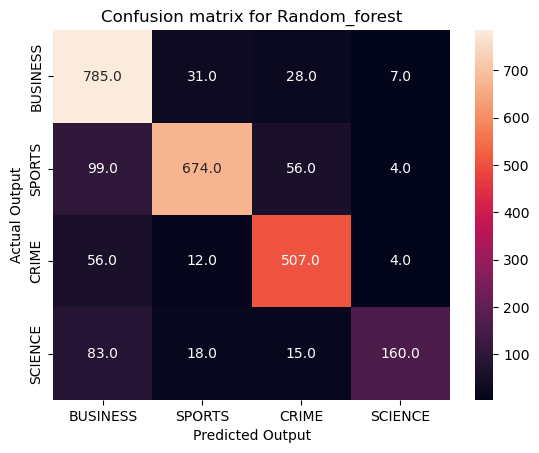

In [34]:
confusion_m =confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_m, annot = True, fmt = '.1f',
            xticklabels = ['BUSINESS', 'SPORTS', 'CRIME', 'SCIENCE'], yticklabels = ['BUSINESS', 'SPORTS', 'CRIME', 'SCIENCE'])
plt.xlabel('Predicted Output')
plt.ylabel('Actual Output')
plt.title("Confusion matrix for Random_forest")
plt.show();